In [1]:
import geopandas as gpd
import pandas as pd
import shapely as sh

In [2]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio
import plotly.figure_factory as ff

from matplotlib.pyplot import figure
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import os
import numpy as np

In [3]:
init_notebook_mode(connected=True)

In [4]:
geodf = gpd.read_file("C:/Users/jlbochenek/OneDrive - Educational Testing Service/Lydia Liu/China Map/gadm36_CHN_1.shp", encoding="UTF-8")
twgeodf = gpd.read_file("gadm36_TWN_0.shp", encoding="UTF-8")
hkgeodf = gpd.read_file("gadm36_HKG_0.shp", encoding="UTF-8")
maeodf = gpd.read_file("gadm36_MAC_0.shp", encoding="UTF-8")


#china = geodf.explode()
#china.to_file("china2.geojson", driver = "GeoJSON",encoding="UTF-8")


#print(geodf['NAME_2'].unique())
#china = geodf.decode('utf-8')

In [5]:
twgeodf.columns = ['GID_0', 'NAME_1', 'geometry']
hkgeodf.columns = ['GID_0', 'NAME_1', 'geometry']
maeodf.columns = ['GID_0', 'NAME_1', 'geometry']

In [6]:
all_china=pd.DataFrame.append(geodf, twgeodf)

C:\Users\jlbochenek\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [7]:
all_china=pd.DataFrame.append(all_china, hkgeodf)

In [8]:
all_china=pd.DataFrame.append(all_china, maeodf)

In [9]:
lat={'Anhui': 33.25043683,
          'Beijing': 39.5400529,
          'Chongqing':31.05044191,
          'Fujian':26.2299868,
          'Gansu':39.83003522,
          'Guangdong': 23.07997235,
          'Guangxi':23.07997235,
          'Guizhou':27.68041506,
          'Hainan':18.25910454,
          'Hebei':37.71998313,
          'Heilongjiang':46.39999595,
          'Henan':33.57000388,
          'Hubei':32.57003908,
          'Hunan':25.96997683,
          'Jiangsu':34.38000612,
          'Jiangxi':27.97034568,
          'Jilin':45.49999921,
          'Liaoning':41.81001772,
          'Nei Mongol':50.78332013,
          'Ningxia Hui':39.23327578, 
          'Qinghai':35.7448,
          'Shaanxi':34.79525209,
          'Shandong':35.98995953,
          'Shanghai':31.21645245,
          'Shanxi':37.86997398,
          'Sichuan':31.13333091,
          'Tianjin':39.23195803,
          'Xinjiang Uygur':42.93537539,
          'Xizang':28.95000165, 
          'Yunnan':25.03331565,
          'Zhejiang':28.85000775
         }

long={'Anhui': 115.3500028,
          'Beijing': 115.789976,
          'Chongqing':109.5166638,
          'Fujian':117.5800476,
          'Gansu':97.72999304,
          'Guangdong': 114.3999833,
          'Guangxi':108.6199743,
          'Guizhou':109.1300207,
          'Hainan':109.5040317,
          'Hebei':115.7000073,
          'Heilongjiang':125.3200402,
          'Henan':114.02998,
          'Hubei':110.7799975,
          'Hunan':113.400044,
          'Jiangsu':118.3500264,
          'Jiangxi':116.3600187,
          'Jilin':124.2999991,
          'Liaoning':120.7600085,
          'Nei Mongol':121.5166548,
          'Ningxia Hui':39.23327578, 
          'Qinghai':96.4077,
          'Shaanxi':109.937775,
          'Shandong':119.3800927,
          'Shanghai':121.4365047,
          'Shanxi':113.5700081,
          'Sichuan':104.3999735,
          'Tianjin':117.7769864,
          'Xinjiang Uygur':89.1650378,
          'Xizang':89.63332963, 
          'Yunnan':98.46658891,
          'Zhejiang':121.1199865
         }


In [10]:
myvalues={'Anhui': 1329,
          'Beijing': 10170, #10170
          'Chongqing':836,
          'Fujian':568,
          'Gansu':296,
          'Guangdong': 3937,
          'Guangxi':88,
          'Guizhou':0,
          'Hainan':0,
          'Hebei':1224,
          'Heilongjiang':447,
          'Henan':883,
          'Hubei':2071,
          'Hunan':769,
          'Jiangsu':5206,
          'Jiangxi':628,
          'Jilin':542,
          'Liaoning':1253,
          'Nei Mongol':380,
          'Ningxia Hui':0, 
          'Qinghai':0,
          'Shaanxi':1243,
          'Shandong':2325,
          'Shanghai':4861,
          'Shanxi':452,
          'Sichuan':2129,
          'Tianjin':1562,
          'Xinjiang Uygur':109,
          'Xizang':0, 
          'Yunnan':324,
          'Zhejiang':3694,
          'Hong Kong': 1859,
          'Macao': 159,
          'Taiwan': 4103,
          #'Hong Kong': 0,
          #'Macao': 0,
          #'Taiwan': 0,
         }

In [11]:
names={'Anhui': "安徽",
       'Beijing': "北京",
      'Chongqing':"重庆",
          'Fujian':"福建",
          'Gansu':"甘肃",
          'Guangdong':"广东",
          'Guangxi':"广西",
          'Guizhou':"贵州",
          'Hainan':"海南",
          'Hebei':"河北",
          'Heilongjiang':"黑龙江",
          'Henan':"河南",
          'Hubei':"湖北",
          'Hunan':"湖南",
          'Jiangsu':"江苏",
          'Jiangxi':"江西",
          'Jilin':"吉林",
          'Liaoning':"辽宁",
          'Nei Mongol':"内蒙古",
          'Ningxia Hui':"宁夏",
          'Qinghai':"青海",
          'Shaanxi':"陕西",
          'Shandong':"山东",
          'Shanghai':"上海",
          'Shanxi':"山西",
          'Sichuan':"四川",
          'Tianjin':"天津",
          'Xinjiang Uygur':"新疆",
          'Xizang':"西藏",
          'Yunnan':"云南",
          'Zhejiang':"浙江",
            'Hong Kong': "香港",
           'Macao':"澳门",
           'Taiwan':"台湾"
      }

In [14]:
regions={'湖北':"中部",
"湖南":"中部",
"河南":"中部",
"安徽":'东部',
"山东":'东部',
'江苏':'东部',
'江西':'东部',
"上海":"东部",
"浙江":"东部",
"福建":'东部',
'北京':'北部',
'河北':"北部",
"天津":'北部',
"山西":"北部",
"内蒙古":"北部",
"辽宁":"东北部",
"黑龙江":"东北部",
"吉林":"东北部",
"甘肃":"西北部",
"陕西":"西北部",
"新疆":"西北部",
"宁夏":"西北部",
"青海":"西北部",
"广东":"南部",
"广西":"南部",
"海南":"南部",
"重庆":"西南部",
"云南":"西南部",
"四川":"西南部",
"西藏":"西南部",
"贵州":"西南部",
"台湾":"台湾",
"澳门":"澳门",
"香港":"香港",
        }

In [15]:
categories = {"北京":	"多于 6000",
"江苏":	"5000 - 6000",
"上海":	"4000 - 5000",
"台湾":	"4000 - 5000",
"广东":	"3000 - 4000",
"浙江":	"3000 - 4000",
"山东":	"2000 - 3000",
"四川":	"2000 - 3000",
"湖北":	"2000 - 3000",
"香港":	"1000 - 2000",
"天津":	"1000 - 2000",
"安徽":	"1000 - 2000",
"辽宁":	"1000 - 2000",
"陕西":	"1000 - 2000",
"河北":	"1000 - 2000",
"河南":	"少于 1000",
"重庆":	"少于 1000",
"湖南":	"少于 1000",
"江西":	"少于 1000",
"福建":	"少于 1000",
"吉林":	"少于 1000",
"山西":	"少于 1000",
"黑龙江":	"少于 1000",
"内蒙古":	"少于 1000",
"云南":	"少于 1000",
"甘肃":	"少于 1000",
"澳门":	"少于 1000",
"新疆": "少于 1000",
"广西":	"少于 1000",
 "西藏": "少于 1000",
"贵州": "少于 1000",
"海南": "少于 1000",
"宁夏":"少于 1000",
"青海":"少于 1000",
"西藏":"少于 1000"

    }


In [16]:
pops={"中部": 3723,
"东部": 18611,
"东北部": 2242,
"西北部": 1648,
"南部": 4025,
"西南部": 3289,
"北部":13788,
"台湾":0,
"澳门":0,
"香港":0
#"台湾":4103,
#"澳门":157,
#"香港":1859
     }



In [17]:
d = pd.DataFrame(myvalues.items(), columns=['NAME_1', 'Value'])

china1 = all_china.merge(d, how ='inner')

china1

,CC_1,ENGTYPE_1,GID_0,GID_1,HASC_1,NAME_0,NAME_1,NL_NAME_1,TYPE_1,VARNAME_1,geometry,Value
0,None,Province,CHN,CHN.1_1,CN.AH,China,Anhui,安徽|安徽,Shěng,Ānhuī,"POLYGON ((116.58146667 30.04758644, 116.578948...",1329
1,None,Municipality,CHN,CHN.2_1,CN.BJ,China,Beijing,北京|北京,Zhíxiáshì,Běijīng,"POLYGON ((116.23774719 39.51793671, 116.237213...",10170
2,None,Municipality,CHN,CHN.3_1,CN.CQ,China,Chongqing,重慶|重庆,Zhíxiáshì,Chóngqìng,"POLYGON ((109.231987 28.87889671, 109.23277283...",836
3,None,Province,CHN,CHN.4_1,CN.FJ,China,Fujian,福建,Shěng,Fújiàn,"(POLYGON ((117.68902588 23.53347206, 117.68902...",568
4,None,Province,CHN,CHN.5_1,CN.GS,China,Gansu,甘肅|甘肃,Shěng,Gānsù,"POLYGON ((101.77423096 33.5480423, 101.7722778...",296
5,None,Province,CHN,CHN.6_1,CN.GD,China,Guangdong,廣東|广东,Shěng,Guǎngdōng,"(POLYGON ((110.5890274 20.37208366, 110.589027...",3937
6,None,Autonomous Region,CHN,CHN.7_1,CN.GX,China,Guangxi,廣西壯族自治區|广西壮族自治区,Zìzhìqu,Guǎngxī Zhuàngzú,"(POLYGON ((109.20569611 20.91847038, 109.20569...",88
7,None,Province,CHN,CHN.8_1,CN.GZ,China,Guizhou,貴州|贵州,Shěng,Gùizhōu,"(POLYGON ((109.55131531 26.72297478, 109.54438...",0
8,None,Province,CHN,CHN.9_1,CN.HA,China,Hainan,海南,Shěng,Hǎinán,"(POLYGON ((108.95291901 18.32514191, 108.95291...",0
9,None,Province,CHN,CHN.10_1,CN.HB,China,Hebei,河北,Shěng,Héběi,"(POLYGON ((118.56236267 38.97624969, 118.56236...",1224


In [18]:
latit = pd.DataFrame(lat.items(), columns=['NAME_1', 'Latitude'])

china2 = china1.merge(latit, how ='inner')

In [19]:
longit = pd.DataFrame(long.items(), columns=['NAME_1', 'Longitude'])

china = china2.merge(longit, how ='inner')

In [20]:
namesit = pd.DataFrame(names.items(), columns=['NAME_1', 'Name'])

china = china1.merge(namesit, how ='inner')

In [21]:
regionsit = pd.DataFrame(regions.items(), columns=['Name', 'Region'])

china = china.merge(regionsit, how ='inner')

In [22]:
categoriesit = pd.DataFrame(categories.items(), columns=['Name', 'Category'])

china = china.merge(categoriesit, how ='inner')

In [23]:
china

,CC_1,ENGTYPE_1,GID_0,GID_1,HASC_1,NAME_0,NAME_1,NL_NAME_1,TYPE_1,VARNAME_1,geometry,Value,Name,Region,Category
0,None,Province,CHN,CHN.1_1,CN.AH,China,Anhui,安徽|安徽,Shěng,Ānhuī,"POLYGON ((116.58146667 30.04758644, 116.578948...",1329,安徽,东部,1000 - 2000
1,None,Municipality,CHN,CHN.2_1,CN.BJ,China,Beijing,北京|北京,Zhíxiáshì,Běijīng,"POLYGON ((116.23774719 39.51793671, 116.237213...",10170,北京,北部,多于 6000
2,None,Municipality,CHN,CHN.3_1,CN.CQ,China,Chongqing,重慶|重庆,Zhíxiáshì,Chóngqìng,"POLYGON ((109.231987 28.87889671, 109.23277283...",836,重庆,西南部,少于 1000
3,None,Province,CHN,CHN.4_1,CN.FJ,China,Fujian,福建,Shěng,Fújiàn,"(POLYGON ((117.68902588 23.53347206, 117.68902...",568,福建,东部,少于 1000
4,None,Province,CHN,CHN.5_1,CN.GS,China,Gansu,甘肅|甘肃,Shěng,Gānsù,"POLYGON ((101.77423096 33.5480423, 101.7722778...",296,甘肃,西北部,少于 1000
5,None,Province,CHN,CHN.6_1,CN.GD,China,Guangdong,廣東|广东,Shěng,Guǎngdōng,"(POLYGON ((110.5890274 20.37208366, 110.589027...",3937,广东,南部,3000 - 4000
6,None,Autonomous Region,CHN,CHN.7_1,CN.GX,China,Guangxi,廣西壯族自治區|广西壮族自治区,Zìzhìqu,Guǎngxī Zhuàngzú,"(POLYGON ((109.20569611 20.91847038, 109.20569...",88,广西,南部,少于 1000
7,None,Province,CHN,CHN.8_1,CN.GZ,China,Guizhou,貴州|贵州,Shěng,Gùizhōu,"(POLYGON ((109.55131531 26.72297478, 109.54438...",0,贵州,西南部,少于 1000
8,None,Province,CHN,CHN.9_1,CN.HA,China,Hainan,海南,Shěng,Hǎinán,"(POLYGON ((108.95291901 18.32514191, 108.95291...",0,海南,南部,少于 1000
9,None,Province,CHN,CHN.10_1,CN.HB,China,Hebei,河北,Shěng,Héběi,"(POLYGON ((118.56236267 38.97624969, 118.56236...",1224,河北,北部,1000 - 2000


In [23]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,15)

In [24]:
regionsmap = china.dissolve(by='Region')

In [25]:
regionsmap

,geometry,CC_1,ENGTYPE_1,GID_0,GID_1,HASC_1,NAME_0,NAME_1,NL_NAME_1,TYPE_1,VARNAME_1,Value,Name,Category
Region,,,,,,,,,,,,,,
东北部,"(POLYGON ((120.99346924 40.84208298, 120.99346...",NaN,Province,CHN,CHN.11_1,CN.HL,China,Heilongjiang,黑龙江省|黑龍江省,Shěng,Hēilóngjiāng,447,黑龙江,少于 1000
东部,"(POLYGON ((117.68902588 23.53347206, 117.68902...",NaN,Province,CHN,CHN.1_1,CN.AH,China,Anhui,安徽|安徽,Shěng,Ānhuī,1329,安徽,1000 - 2000
中部,"POLYGON ((112.98812866 24.92126083, 112.985351...",NaN,Province,CHN,CHN.12_1,CN.HE,China,Henan,河南,Shěng,Hénán,883,河南,少于 1000
北部,"(POLYGON ((113.83146667 44.85960007, 113.79670...",NaN,Municipality,CHN,CHN.2_1,CN.BJ,China,Beijing,北京|北京,Zhíxiáshì,Běijīng,10170,北京,多于 6000
南部,"(POLYGON ((110.58097076 19.14764023, 110.58097...",NaN,Province,CHN,CHN.6_1,CN.GD,China,Guangdong,廣東|广东,Shěng,Guǎngdōng,3937,广东,3000 - 4000
台湾,"(POLYGON ((116.71722412 20.70959473, 116.71778...",NaN,NaN,TWN,NaN,NaN,NaN,Taiwan,NaN,NaN,NaN,4103,台湾,4000 - 5000
澳门,"(POLYGON ((113.57655334 22.13850021, 113.57688...",NaN,NaN,MAC,NaN,NaN,NaN,Macao,NaN,NaN,NaN,159,澳门,少于 1000
西北部,"POLYGON ((101.11694336 32.63639832, 101.112701...",NaN,Province,CHN,CHN.5_1,CN.GS,China,Gansu,甘肅|甘肃,Shěng,Gānsù,296,甘肃,少于 1000
西南部,"(POLYGON ((109.55131531 26.72297478, 109.54438...",NaN,Municipality,CHN,CHN.3_1,CN.CQ,China,Chongqing,重慶|重庆,Zhíxiáshì,Chóngqìng,836,重庆,少于 1000


In [26]:
regionsmap = regionsmap.merge(regionsit, how ='inner')

In [27]:
popit = pd.DataFrame(pops.items(), columns=['Region', 'N'])

regionsmap = regionsmap.merge(popit, how ='inner')

In [28]:
regionsmap

,geometry,CC_1,ENGTYPE_1,GID_0,GID_1,HASC_1,NAME_0,NAME_1,NL_NAME_1,TYPE_1,VARNAME_1,Value,Name,Category,Region,N
0,"(POLYGON ((120.99346924 40.84208298, 120.99346...",NaN,Province,CHN,CHN.11_1,CN.HL,China,Heilongjiang,黑龙江省|黑龍江省,Shěng,Hēilóngjiāng,447,黑龙江,少于 1000,东北部,2242
1,"(POLYGON ((117.68902588 23.53347206, 117.68902...",NaN,Province,CHN,CHN.1_1,CN.AH,China,Anhui,安徽|安徽,Shěng,Ānhuī,1329,安徽,1000 - 2000,东部,18611
2,"POLYGON ((112.98812866 24.92126083, 112.985351...",NaN,Province,CHN,CHN.12_1,CN.HE,China,Henan,河南,Shěng,Hénán,883,河南,少于 1000,中部,3723
3,"(POLYGON ((113.83146667 44.85960007, 113.79670...",NaN,Municipality,CHN,CHN.2_1,CN.BJ,China,Beijing,北京|北京,Zhíxiáshì,Běijīng,10170,北京,多于 6000,北部,13788
4,"(POLYGON ((110.58097076 19.14764023, 110.58097...",NaN,Province,CHN,CHN.6_1,CN.GD,China,Guangdong,廣東|广东,Shěng,Guǎngdōng,3937,广东,3000 - 4000,南部,4025
5,"(POLYGON ((116.71722412 20.70959473, 116.71778...",NaN,NaN,TWN,NaN,NaN,NaN,Taiwan,NaN,NaN,NaN,4103,台湾,4000 - 5000,台湾,0
6,"(POLYGON ((113.57655334 22.13850021, 113.57688...",NaN,NaN,MAC,NaN,NaN,NaN,Macao,NaN,NaN,NaN,159,澳门,少于 1000,澳门,0
7,"POLYGON ((101.11694336 32.63639832, 101.112701...",NaN,Province,CHN,CHN.5_1,CN.GS,China,Gansu,甘肅|甘肃,Shěng,Gānsù,296,甘肃,少于 1000,西北部,1648
8,"(POLYGON ((109.55131531 26.72297478, 109.54438...",NaN,Municipality,CHN,CHN.3_1,CN.CQ,China,Chongqing,重慶|重庆,Zhíxiáshì,Chóngqìng,836,重庆,少于 1000,西南部,3289
9,"(POLYGON ((113.92319489 22.15680695, 113.92319...",NaN,NaN,HKG,NaN,NaN,NaN,Hong Kong,NaN,NaN,NaN,1859,香港,1000 - 2000,香港,0


In [29]:
china["center"] = china["geometry"].centroid
china_points = china.copy()
china_point = china.representative_point()
china_points.set_geometry("center", inplace = True)
china_point

0          POINT (117.1514939058922 32.025060655)
1     POINT (116.6239986956698 40.25089454499999)
2           POINT (107.8697543671771 30.18792343)
3           POINT (118.0066179986818 25.95639038)
4          POINT (102.8898825159015 37.683776855)
5           POINT (113.4845902278693 22.87138939)
6          POINT (108.9834770074989 23.891474725)
7          POINT (106.6219693325569 26.920225145)
8              POINT (109.629302975 19.160971645)
9          POINT (115.6662592348227 39.331897735)
10    POINT (127.5834428553101 48.48430442999999)
11          POINT (113.0699639477535 33.87928581)
12          POINT (112.8762721931626 31.15678692)
13          POINT (111.3539658227574 27.38163948)
14           POINT (119.954297307683 32.94665718)
15         POINT (115.5121782771466 27.281518935)
16          POINT (126.1243655650808 43.58426857)
17         POINT (122.3889678549601 41.105239865)
18         POINT (118.7874160797809 45.397537235)
19            POINT (105.9609730755 37.309328075)


In [30]:
regionsmap["center"] = regionsmap["geometry"].centroid
regions_points = regionsmap.copy()
region_point = regionsmap.representative_point()
regions_points.set_geometry("center", inplace = True)
regions_points

,geometry,CC_1,ENGTYPE_1,GID_0,GID_1,HASC_1,NAME_0,NAME_1,NL_NAME_1,TYPE_1,VARNAME_1,Value,Name,Category,Region,N,center
0,"(POLYGON ((120.99346924 40.84208298, 120.99346...",NaN,Province,CHN,CHN.11_1,CN.HL,China,Heilongjiang,黑龙江省|黑龍江省,Shěng,Hēilóngjiāng,447,黑龙江,少于 1000,东北部,2242,POINT (126.5283264746237 45.7517399371385)
1,"(POLYGON ((117.68902588 23.53347206, 117.68902...",NaN,Province,CHN,CHN.1_1,CN.AH,China,Anhui,安徽|安徽,Shěng,Ānhuī,1329,安徽,1000 - 2000,东部,18611,POINT (117.914235848369 30.87806158493265)
2,"POLYGON ((112.98812866 24.92126083, 112.985351...",NaN,Province,CHN,CHN.12_1,CN.HE,China,Henan,河南,Shěng,Hénán,883,河南,少于 1000,中部,3723,POINT (112.4728868467549 30.62874336058792)
3,"(POLYGON ((113.83146667 44.85960007, 113.79670...",NaN,Municipality,CHN,CHN.2_1,CN.BJ,China,Beijing,北京|北京,Zhíxiáshì,Běijīng,10170,北京,多于 6000,北部,13788,POINT (114.0705433040117 42.85903293413326)
4,"(POLYGON ((110.58097076 19.14764023, 110.58097...",NaN,Province,CHN,CHN.6_1,CN.GD,China,Guangdong,廣東|广东,Shěng,Guǎngdōng,3937,广东,3000 - 4000,南部,4025,POINT (110.6931829387179 23.2897265634496)
5,"(POLYGON ((116.71722412 20.70959473, 116.71778...",NaN,NaN,TWN,NaN,NaN,NaN,Taiwan,NaN,NaN,NaN,4103,台湾,4000 - 5000,台湾,0,POINT (120.9565861350879 23.75263318914321)
6,"(POLYGON ((113.57655334 22.13850021, 113.57688...",NaN,NaN,MAC,NaN,NaN,NaN,Macao,NaN,NaN,NaN,159,澳门,少于 1000,澳门,0,POINT (113.5613311429502 22.16235051420972)
7,"POLYGON ((101.11694336 32.63639832, 101.112701...",NaN,Province,CHN,CHN.5_1,CN.GS,China,Gansu,甘肅|甘肃,Shěng,Gānsù,296,甘肃,少于 1000,西北部,1648,POINT (91.63598035163355 39.0062758014877)
8,"(POLYGON ((109.55131531 26.72297478, 109.54438...",NaN,Municipality,CHN,CHN.3_1,CN.CQ,China,Chongqing,重慶|重庆,Zhíxiáshì,Chóngqìng,836,重庆,少于 1000,西南部,3289,POINT (95.58563426413346 29.93960073278963)
9,"(POLYGON ((113.92319489 22.15680695, 113.92319...",NaN,NaN,HKG,NaN,NaN,NaN,Hong Kong,NaN,NaN,NaN,1859,香港,1000 - 2000,香港,0,POINT (114.1349648762404 22.38112079788376)


In [24]:
colors= {"多于 6000":(214/256,0,20/256),
"5000 - 6000": (225/256,0,42/256),
"4000 - 5000":(234/256,77/256,106/256),
"3000 - 4000":(237/256,109/256,133/256),
"2000 - 3000":(243/256,153/256,170/256),
"1000 - 2000":  (250/256,209/256,217/256),
"少于 1000": (253/256,237/256,240/256)}

In [49]:
cmap2 = LinearSegmentedColormap.from_list("", [(214/256,0,20/256),(225/256,0,42/256),(234/256,77/256,106/256),(243/256,153/256,170/256),(250/256,209/256,217/256),(253/256,237/256,240/256)])

No handles with labels found to put in legend.


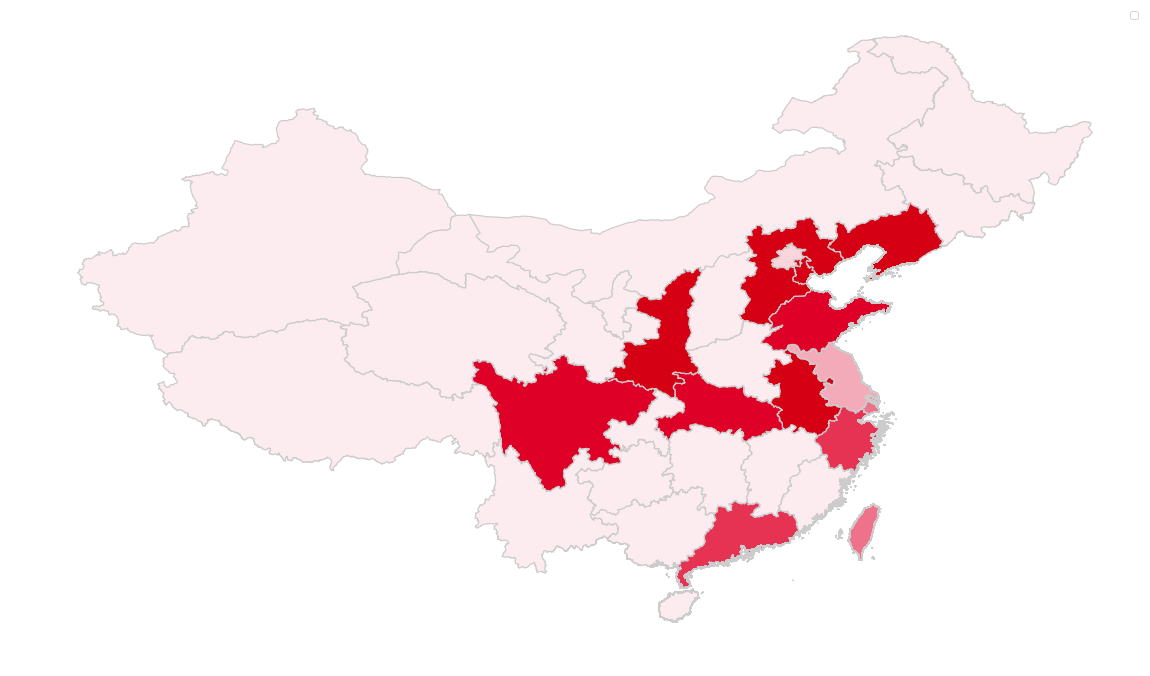

In [52]:
vmin, vmax = 120, 220
texts = []

from matplotlib.font_manager import FontProperties
import math

ChineseFont1 = FontProperties(fname = 'C:\\Windows\\Fonts\\simsun.ttc')
ChineseFont2 = FontProperties('SimHei')

fig, ax = plt.subplots(1, figsize=(20, 12))
china.plot('Category', cmap=cmap2, linewidth=1.2, ax=ax, edgecolor='.8')
ax.axis('off')
#plt.legend("Category")
ax.legend()
#ax.legend(ncol=len('Categories'), bbox_to_anchor=(0, 1),
#              loc='lower left', fontsize='small')
#plt.clim(-1, 1)
#for x, y, label in zip(china_points.geometry.x, china_points.geometry.y, china_points['Name']):
#    texts.append(plt.text(x, y, label, fontsize = 10,  fontproperties = ChineseFont1))

fig.savefig('chinamap.png', dpi=600)

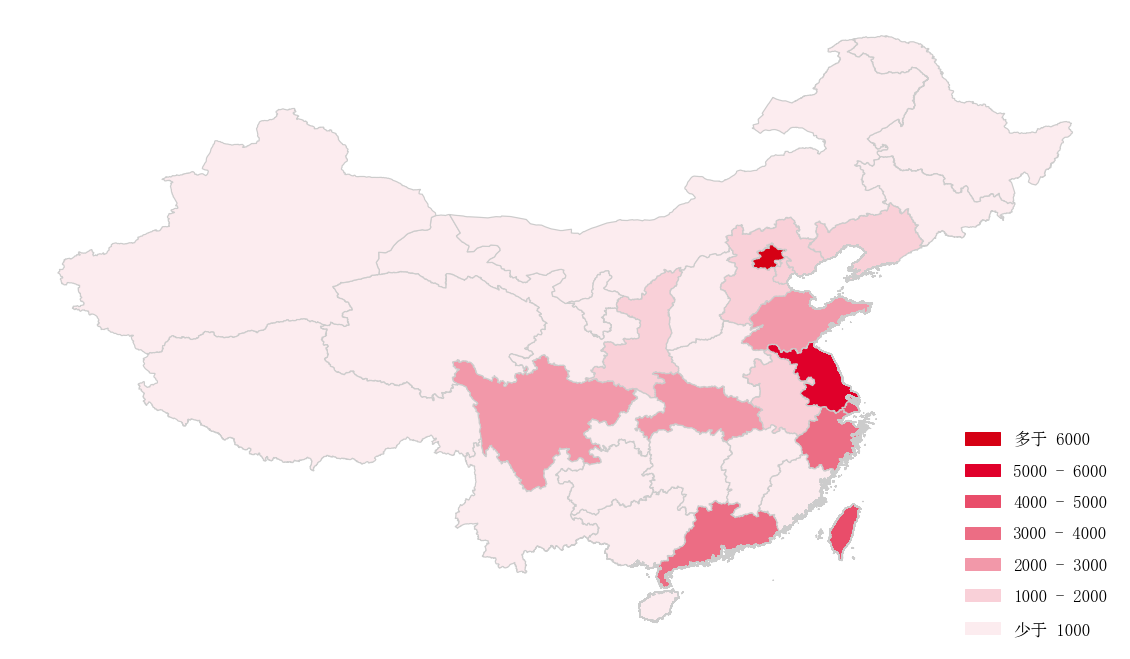

In [26]:
vmin, vmax = 120, 220
texts = []
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import math
import matplotlib.patches as mpatches
fig, ax = plt.subplots(figsize=(20, 12))
ax.set_axis_off()
ChineseFont1 = FontProperties(fname = 'C:\\Windows\\Fonts\\simsun.ttc',size="xx-large")
ChineseFont2 = FontProperties('SimHei')
for ctype, data in china.groupby("Category"):
    color = colors[ctype]
    label = ctype
    data.plot(color=color, 
              linewidth=1.2, 
              ax=ax, 
              edgecolor='.8', 
              label = label)
patchList = []
for key in colors:
        data_key = mpatches.Patch(color=colors[key], label=key)
        patchList.append(data_key)
        
ax.legend(handles = patchList,
            loc='lower right',
          labelspacing=1,
          frameon=False,
          prop=ChineseFont1)

fig.savefig('chinamap.png', dpi=600)

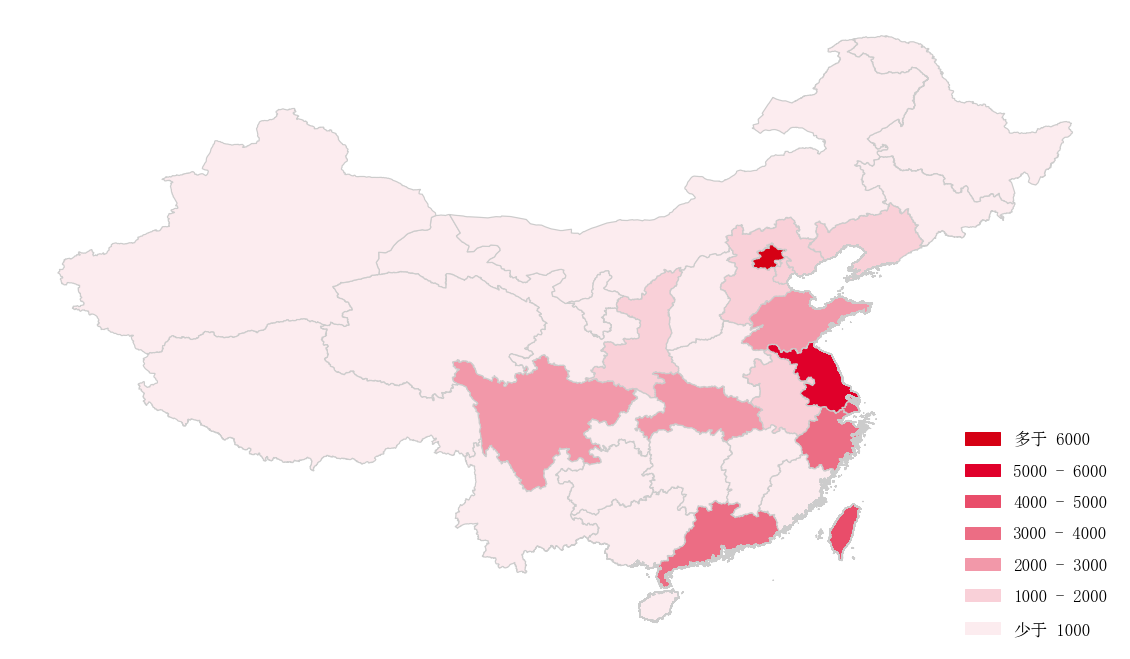

In [32]:
vmin, vmax = 120, 220
texts = []

from matplotlib.font_manager import FontProperties
import math
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
import numpy.ma as ma

axins = zoomed_inset_axes(ax, 2, loc=3)
x1, x2, y1, y2 = 150, 550, 150, 550 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits

fig, ax = plt.subplots(figsize=(20, 12))
ax.set_axis_off()
ChineseFont1 = FontProperties(fname = 'C:\\Windows\\Fonts\\simsun.ttc',size="xx-large")
ChineseFont2 = FontProperties('SimHei')
for ctype, data in china.groupby("Category"):
    color = colors[ctype]
    label = ctype
    data.plot(color=color, 
              linewidth=1.2, 
              ax=ax, 
              edgecolor='.8', 
              label = label)
patchList = []
for key in colors:
        data_key = mpatches.Patch(color=colors[key], label=key)
        patchList.append(data_key)
        
ax.legend(handles = patchList,
            loc='lower right',
          labelspacing=1,
          frameon=False,
          prop=ChineseFont1)

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

fig.savefig('chinamapinset.png', dpi=600)

In [ ]:
vmin, vmax = 120, 220
texts = []
from matplotlib.font_manager import FontProperties
import math

ChineseFont1 = FontProperties(fname = 'C:\\Windows\\Fonts\\simsun.ttc')
ChineseFont2 = FontProperties('SimHei')

fig, ax = plt.subplots(1, figsize=(20, 12))
regionsmap.plot('N', cmap=cmap2, linewidth=1.2, ax=ax, edgecolor='.8')
ax.axis('off')
#for x, y, label in zip(regions_points.geometry.x, regions_points.geometry.y, regions_points['Region']):
#    texts.append(plt.text(x, y, label, fontsize = 10,  fontproperties = ChineseFont1))

fig.savefig('regionmap.png', dpi=600)

In [57]:
colors

{'多于 6000': (0.8359375, 0, 0.078125),
 '5000 - 6000': (0.87890625, 0, 0.1640625),
 '4000 - 5000': (0.9140625, 0.30078125, 0.4140625),
 '3000 - 4000': (0.92578125, 0.42578125, 0.51953125),
 '2000 - 3000': (0.94921875, 0.59765625, 0.6640625),
 '1000 - 2000': (0.9765625, 0.81640625, 0.84765625),
 '少于 1000': (0.98828125, 0.92578125, 0.9375)}